# 2014 트렌드

In [1]:
import pandas as pd
import numpy as np
from kiwipiepy import Kiwi
import copy
import re
from kiwipiepy.utils import Stopwords
import nltk

from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리
%matplotlib inline
import konlpy

C:\Users\cutad\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('../data_trend/2014년 트렌드.csv', encoding='utf-8')

# postdate, body, description, title 칼럼만 사용 
df = df[['postdate', 'body', 'description', 'title']]
df.head()

,postdate,body,description,title
0,20231128,"안녕하세요, 패션스타일리스트 여러분! 오늘은 새로운 도전의 시간입니다. 함께 201...",이제 여러분은 <b>2014년<\/b>의 <b>트렌드<\/b>를 기반으로 하여 자유...,패션 스타일링의 예술: 2014년 트렌드를 바탕으로
1,20231220,"안녕하세요, 패션 열정을 품고 있는 여러분! 오늘은 2014년의 트렌드를 다시 한 ...","이를 바탕으로 자신만의 스타일을 찾고, 2014년의 패션 트렌드를 따라할 수 있습니...",2014년 패션 트렌드를 익히고 자신만의 스타일로 빛나게 하세요!
2,20231215,"안녕하세요, 패션 열정을 키우는 여러분! 오늘은 패션의 과거에서 영감을 받아 새로운...","<b>2014년<\/b>, 특히 눈에 띄었던 <b>트렌드<\/b> 중 하나는 플라워...","패션의 시간을 거슬러, 2014년 트렌드로 떠나는 스타일링 여행"
3,20231222,"안녕하세요, 패션스타일리스트 여러분! 오늘은 2014년의 패션 트렌드를 다시 한 번...",플로럴 패턴 꽃 무늬를 활용한 플로럴 패턴은 <b>2014년<\/b>의 <b>트렌드...,2014년 트렌드를 반영한 다양한 패션 스타일
4,20240216,"안녕하세요, 패션 열정을 품고 있는 여러분! 오늘은 2014년에 빛난 패션 트렌드를...",<b>2014년<\/b> 패션 <b>트렌드<\/b>의 다양한 스타일을 살펴보았습니다...,2014년 패션 트렌드: 패션스타일리스트의 추천 TOP 10


## 1. 전처리

In [3]:
# 전처리할 칼럼들
columns = ['body', 'description', 'title']

# 중복 제거
df.drop_duplicates(subset=columns, inplace=True)

for column in columns:
    # 정규표현식 - 한글, 숫자, 영어 및 공백 이외의 문자 제거
    df[column] = df[column].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z ]", "", regex=True)
    # 앞뒤 공백 제거
    df[column] = df[column].str.strip()
    # 여러 개의 공백을 하나의 공백으로 변경
    df[column] = df[column].str.replace(' +', " ", regex=True)

# 공백만 있는 칼럼을 NaN으로 변경 후 제거
df[columns] = df[columns].replace('', np.nan)
df.dropna(subset=columns, how='any', inplace=True)

In [4]:
from kiwipiepy import Kiwi

# Kiwi 초기화
kiwi = Kiwi()

# 불용어 리스트 정의 및 파일 로드
additional_stopwords = ['트렌드', '2014년', '본문', '다양', '출처', '활용', '표현', '대하', '선택', '완성', 
                        '오늘','유행', '올해', '가지', '안녕하세요', '소개', '전망', '포스팅', '기간', 
                        '시즌', '세계', '제목', '추천', '최신', '역할',  '기업', '산업', '주목',  '시작', '중요', 
                        '편안', '요소', '개발', '사용', '촬영', '제공', '강조', '제품', '부동산', '수요', '증가',
                        '관심', '기술', '규모', '해석', '가능', '사업', '느낌', '필요', '인공', '블랙', '소비자',
                        '서비스', '관련', '지능', '생각', '아이디어', '색상', '모습', '전략', '경우', '매치', '시대', 
                        '때문', '드레스', '실루엣', '주요', '여정', '정보', '사람', '동시', '기반', '핵심', '사이즈',
                        '상품', '이후', '동물', '가격', '분야', '확보', '의미', '당시', '시설', '출시', '대비', '제작사',
                        '계획', '도움', '분석', '강화', '믹스', '자동차', '지역', '키워드', '시도', '중심', '수준',
                        '해당', '부지', '공간', '발표', '단순', '기회', '센터', '진행', '구성', '디테일', '방법', '업계',
                        '판매', '아파트', '세대', '이야기', '고려', '기대', '확대', '사회', '생활', '예상', '고객', '전문',
                        '포함', '등장', '특수', '최근', '전기', '활동', '가구', '세미나', '확인', '여름', '운영', '참여', '행사',
                        '상승', '경쟁', '프로젝트', '창의', '반영', '선호', '무인', '기준', '정책', '특징', '달러', '수변', '보이', 
                        '관리', '계약', '전문가', '결과', '사진', '결합', '효과', '내용', '부스', '단위', '자료', '조성', '진출', 
                        '라이프', '미래', '예정', '수단', '경기', '적용', '마지막', '비즈니스', '자리', '유치', '상황', '전체', '실내', 
                        '혁신', '정도', '목표', '이유', '장기', '매출', '영향', '플러스', '지원', '회사', '유지', '감소', '경험', 
                        '기존', '개최', '과정', '내수', '예측', '가방', '야외', '가치', '년대', '노력', '효율', '생산'
                        ]

# 불용어 텍스트 파일에서 불용어 읽기
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_list = file.read().splitlines()
    return stopwords_list

# 파일에서 불용어 목록 로드
stopwords_file_path = '../stopwords.txt'
file_stopwords = load_stopwords(stopwords_file_path)

# 불용어 리스트 결합
all_stopwords = set(additional_stopwords + file_stopwords)

In [5]:
# 불용어 제거 함수 정의
def remove_stopwords(text, stopwords):
    tokens = kiwi.tokenize(text)
    filtered_tokens = [token.form for token in tokens if token.form not in stopwords]
    return ' '.join(filtered_tokens)

# 전처리 함수 정의
def preprocess_korean(text, analyzer=kiwi, stopwords=all_stopwords):
    my_text = copy.copy(text)
    my_text = my_text.replace('\n', ' ') # (1) 줄바꿈 문자 제거
    my_text = analyzer.space(my_text) # (2) 띄어쓰기 교정
    sents = analyzer.split_into_sents(my_text) # (3) 문장 토큰화
    p = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]')
    all_result = []
    for sent in sents:
        token_result = remove_stopwords(sent.text, stopwords) # (4) 형태소 분석 및 불용어 제거
        token_result = p.sub(' ', token_result) # (5) 특수 문자 제거 (=한글을 제외한 문자 제거)
        all_result.append(token_result) # (6) 형태소 분석한 결과를 다시 join
    
    all_result = ' '.join(all_result) # (7) 모든 문장을 하나의 string으로 join

    return all_result

# 품사(명사, 동사, 형용사, 부사) 추출 함수 정의
def wordclass_korean(my_str, kiwi=kiwi):
    result = []
    tokens = kiwi.tokenize(my_str, normalize_coda=True)
    for token in tokens:
        if token.tag in ['NNG', 'NNP', 'NNB']:  # 명사 태그만 추출
            result.append(token.form)
    result = ' '.join(result)
    return result

In [6]:
%%time
# 전처리 함수 적용
for column in columns:
    preprocessed_column = 'preprocessed_' + column 
    df[preprocessed_column] = df[column].apply(lambda x: preprocess_korean(x))

# 품사 추출 함수 적용
preprocessed_columns = ['preprocessed_body', 'preprocessed_title', 'preprocessed_description']
for column in preprocessed_columns:
    df[column] = df[column].apply(wordclass_korean)

df.head()

CPU times: total: 12.5 s
Wall time: 46.1 s


,postdate,body,description,title,preprocessed_body,preprocessed_description,preprocessed_title
0,20231128,안녕하세요 패션스타일리스트 여러분 오늘은 새로운 도전의 시간입니다 함께 2014년의...,이제 여러분은 b2014년b의 b트렌드b를 기반으로 하여 자유롭고 창의적인 패션 여...,패션 스타일링의 예술 2014년 트렌드를 바탕으로,패션 스타일리스트 은 도전 패션 독창 패션 스타일링 은 관행 독특 스타일 환영 해 ...,은 자유 적 패션 라 독특 개성 스타일 패션,패션 스타일링 예술 바탕
1,20231220,안녕하세요 패션 열정을 품고 있는 여러분 오늘은 2014년의 트렌드를 다시 한 번 ...,이를 바탕으로 자신만의 스타일을 찾고 2014년의 패션 트렌드를 따라할 수 있습니다...,2014년 패션 트렌드를 익히고 자신만의 스타일로 빛나게 하세요,패션 열정 은 번 스타일 알리 은 패션 스타일 인기 해 은 중 인기 패션 스타일 빈...,바탕 스타일 패션 수 패션 스타일링 개성 스타일,패션 스타일
2,20231215,안녕하세요 패션 열정을 키우는 여러분 오늘은 패션의 과거에서 영감을 받아 새로운 스...,b2014년b 특히 눈에 띄었던 b트렌드b 중 하나는 플라워 패턴의 활용이었습니다 ...,패션의 시간을 거슬러 2014년 트렌드로 떠나는 스타일링 여행,패션 열정 은 패션 과거 영감 스타일 스타일리스트 팁 현대 룩 연출 것 눈 중 플라...,중 플라워 패턴 무드 플라워 패턴 도 플라워 패턴 매력,패션 스타일링 여행
3,20231222,안녕하세요 패션스타일리스트 여러분 오늘은 2014년의 패션 트렌드를 다시 한 번 살...,플로럴 패턴 꽃 무늬를 활용한 플로럴 패턴은 b2014년b의 b트렌드b 중 하나였습...,2014년 트렌드를 반영한 다양한 패션 스타일,패션 스타일리스트 은 패션 번 스타일 은 패션 스타일 해 중 패션 스타일 스타일링 ...,플로럴 패턴 꽃 무늬 플로럴 패턴 중 크기 꽃 무늬 여성 분위기 연출 보 세 플로럴...,패션 스타일
4,20240216,안녕하세요 패션 열정을 품고 있는 여러분 오늘은 2014년에 빛난 패션 트렌드를 살...,b2014년b 패션 b트렌드b의 다양한 스타일을 살펴보았습니다 여러분은 어떤 스타일...,2014년 패션 트렌드 패션스타일리스트의 추천 TOP 10,패션 열정 은 빛 패션 패션 스타일리스트 대표 옷 스타일 패션 스타일 중 글 스타일...,패션 스타일 스타일 마음 패션 개성 스타일 스타일,패션 패션 스타일리스트


In [37]:
# 전처리한 결과 csv로 저장 
df.to_csv('14트렌드_전처리.csv', index=False, encoding='utf-8-sig')

## 2. 단어 빈도 계산

In [7]:
# 단어 빈도 계산 및 상위 단어 추출 
def explode_and_count(df, column):
    exploded = df[column].str.split().explode()  # 문자열을 단어 단위로 나누어 행으로 펼침
    word_counts = exploded.value_counts().reset_index()  # 단어 빈도 계산
    word_counts.columns = ['word', 'count']  # 컬럼명 설정
    return word_counts

### [preprocessed_body]

In [8]:
# 각 칼럼에 대해 단어 빈도 계산
word_counts_list = []
for column in ['preprocessed_body']:
    word_counts = explode_and_count(df, column)
    word_counts_list.append(word_counts)

In [9]:
# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body = pd.concat(word_counts_list).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body = all_words_body[all_words_body['word'].str.len() > 1]

# 상위 30개 단어 출력
top_30_words = all_words_body.head(30)
top_30_words

,word,count
2206,스타일,970
4209,패션,783
2222,스튜디오,307
2285,시장,264
4213,패턴,226
2638,연출,201
3940,콘텐츠,188
2424,아이템,184
2209,스타일링,151
3891,컬러,146


In [10]:
l = []
for i in top_30_words['word']:
    l.append(i)
l

['스타일',
 '패션',
 '스튜디오',
 '시장',
 '패턴',
 '연출',
 '콘텐츠',
 '아이템',
 '스타일링',
 '컬러',
 '개성',
 '인기',
 '투자',
 '분위기',
 '디자인',
 '액세서리',
 '여성',
 '독특',
 '조합',
 '의상',
 '현대',
 '스타일리스트',
 '소재',
 '도시',
 '변화',
 '소비',
 '성장',
 '스포티',
 '중국',
 '환경']

### [preprocessed_description]

In [11]:
# 각 칼럼에 대해 단어 빈도 계산
word_counts_list = []
for column in ['preprocessed_description']:
    word_counts = explode_and_count(df, column)
    word_counts_list.append(word_counts)

In [12]:
# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_description = pd.concat(word_counts_list).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_description = all_words_description[all_words_description['word'].str.len() > 1]

# 상위 30개 단어 출력
top_30_words = all_words_description.head(30)
top_30_words

,word,count
2766,컬러,414
2988,패션,338
1534,스타일,194
3233,헤어,150
850,메이크업,135
21,가을,102
2053,웨딩,98
1424,소비,65
632,디자인,54
1707,아이템,52


### [preprocessed_title]

In [13]:
# 각 칼럼에 대해 단어 빈도 계산
word_counts_list = []
for column in ['preprocessed_title']:
    word_counts = explode_and_count(df, column)
    word_counts_list.append(word_counts)

In [14]:
# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_title = pd.concat(word_counts_list).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_title = all_words_title[all_words_title['word'].str.len() > 1]

# 상위 30개 단어 출력
top_30_words = all_words_title.head(30)
top_30_words

,word,count
202,패션,77
99,스타일,24
101,스타일링,22
100,스타일리스트,19
41,리뷰,6
106,시장,6
48,매력,4
61,변화,4
224,현대,4
67,뷰티,3


## 3. 워드 클라우드

참고 사이트: https://serendipity77.tistory.com/entry/영화동감-영화동감-댓글-리뷰-워드-클라우드wordcloud로-만들어보기파이썬-Python 

[엑셀 자동화로 칼퇴하는 김대리의 고군분투기:티스토리]

In [15]:
font_path='C:\\Windows\\Fonts\\malgun.ttf'

### [body WordCloud]

In [16]:
## 데이터 프레임을 딕셔너리 형태로 변환해야 함

dic_word = all_words_body.set_index('word').to_dict()['count']
dic_word

{'스타일': 970,
 '패션': 783,
 '스튜디오': 307,
 '시장': 264,
 '패턴': 226,
 '연출': 201,
 '콘텐츠': 188,
 '아이템': 184,
 '스타일링': 151,
 '컬러': 146,
 '개성': 144,
 '인기': 135,
 '투자': 128,
 '분위기': 125,
 '디자인': 122,
 '액세서리': 119,
 '여성': 113,
 '독특': 110,
 '조합': 104,
 '의상': 101,
 '현대': 95,
 '스타일리스트': 92,
 '소재': 92,
 '도시': 90,
 '변화': 88,
 '소비': 87,
 '성장': 86,
 '스포티': 86,
 '중국': 86,
 '환경': 84,
 '브랜드': 79,
 '매력': 78,
 '빈티지': 77,
 '플로럴': 76,
 '제작': 76,
 '캐주얼': 72,
 '과거': 68,
 '대표': 68,
 '공예': 67,
 '국내': 66,
 '경제': 65,
 '클래식': 65,
 '자유': 64,
 '홍콩': 64,
 '맥주': 64,
 '스커트': 62,
 '영화': 61,
 '레트로': 58,
 '사랑': 51,
 '보헤미안': 50,
 '새만금': 48,
 '스트릿': 47,
 '글로벌': 47,
 '열정': 45,
 '비타민': 45,
 '알콜': 44,
 '조화': 44,
 '코리아': 44,
 '자연': 43,
 '모노': 42,
 '지속': 42,
 '수익': 41,
 '한국': 41,
 '레이스': 41,
 '문화': 39,
 '미국': 38,
 '흑백': 38,
 '해외': 38,
 '세련': 38,
 '모던': 38,
 '심플': 38,
 '포인트': 38,
 '플라워': 36,
 '스트리트': 36,
 '정부': 35,
 '건강': 35,
 '트렌디': 35,
 '발전': 35,
 '일본': 34,
 '캠핑': 34,
 '아름다움': 34,
 '미니멀': 32,
 '오버': 32,
 '일반': 32,
 '고급': 32,
 '원피스'

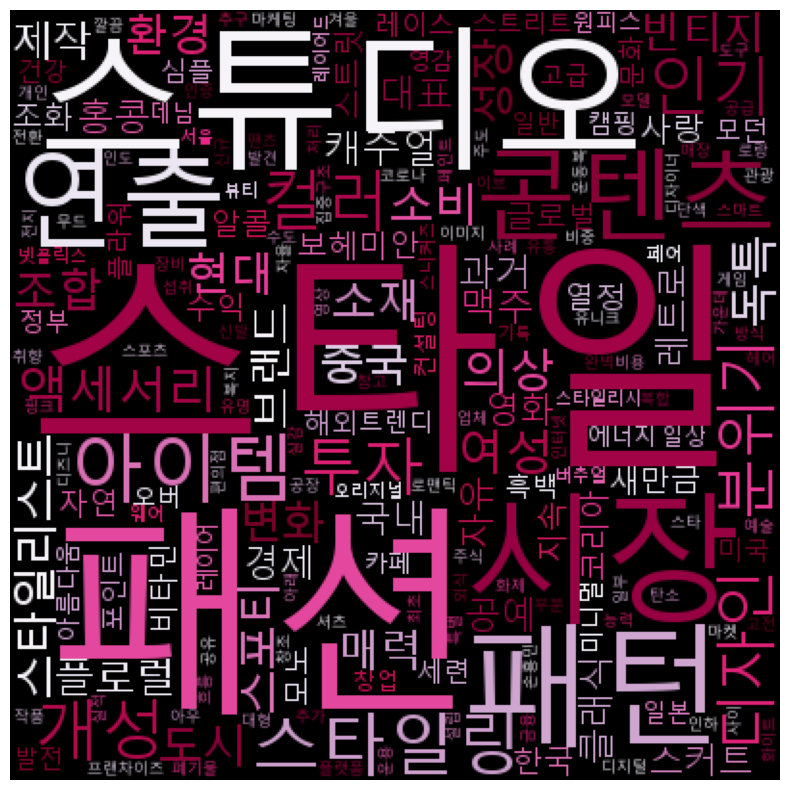

In [17]:
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'PuRd')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBr': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

## [description WordCloud]

In [18]:
## 데이터 프레임을 딕셔너리 형태로 변환해야 함

dic_word = all_words_description.set_index('word').to_dict()['count']
dic_word

{'컬러': 414,
 '패션': 338,
 '스타일': 194,
 '헤어': 150,
 '메이크업': 135,
 '가을': 102,
 '웨딩': 98,
 '소비': 65,
 '디자인': 54,
 '아이템': 52,
 '통계': 50,
 '블루': 49,
 '코리아': 46,
 '겨울': 44,
 '시장': 43,
 '뷰티': 43,
 '변화': 42,
 '코디': 42,
 '헤어스타일': 41,
 '스타일링': 40,
 '준비': 40,
 '팬톤': 40,
 '패턴': 39,
 '여성': 38,
 '사랑': 38,
 '포인트': 38,
 '파스텔': 38,
 '인기': 37,
 '인테리어': 37,
 '마케팅': 36,
 '네일': 36,
 '모바일': 30,
 '문화': 29,
 '남자': 29,
 '방문': 27,
 '선정': 27,
 '브랜드': 26,
 '염색': 26,
 '핑크': 26,
 '머리': 25,
 '교수': 25,
 '한국': 25,
 '개성': 25,
 '브라운': 25,
 '트랜드': 24,
 '요즘': 24,
 '연구소': 23,
 '김난도': 23,
 '글로벌': 23,
 '슈즈': 23,
 '웨딩드레스': 23,
 '미국': 22,
 '신부': 22,
 '아트': 22,
 '방문자': 22,
 '작년': 21,
 '키드': 21,
 '페이지': 21,
 '국내': 21,
 '제시': 21,
 '횟수': 21,
 '성장': 21,
 '래디언트': 20,
 '조사': 19,
 '정리': 19,
 '자연': 19,
 '디자이너': 18,
 '창업': 18,
 '부분': 18,
 '쇼핑': 18,
 '레드': 18,
 '블레스': 18,
 '흐름': 18,
 '날씨': 18,
 '제안': 18,
 '소재': 18,
 '학원': 18,
 '경제': 17,
 '컬렉션': 17,
 '연출': 17,
 '플라워': 16,
 '결혼': 16,
 '스타일리스트': 16,
 '이미지': 16,
 '리뷰': 16,
 '엄마': 16,
 '계절': 1

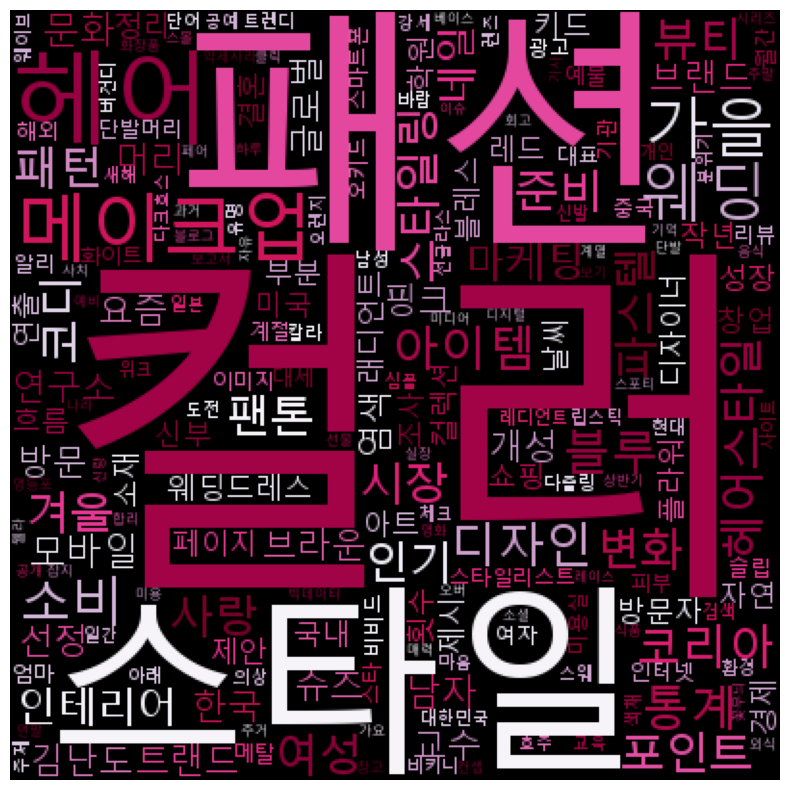

In [20]:
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'PuRd')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기

## [title WordCloud]

In [21]:
## 데이터 프레임을 딕셔너리 형태로 변환해야 함

dic_word = all_words_title.set_index('word').to_dict()['count']
dic_word

{'패션': 77,
 '스타일': 24,
 '스타일링': 22,
 '스타일리스트': 19,
 '리뷰': 6,
 '시장': 6,
 '매력': 4,
 '변화': 4,
 '현대': 4,
 '뷰티': 3,
 '개성': 3,
 '캠핑': 2,
 '솔로': 2,
 '창업': 2,
 '패턴': 2,
 '초월': 2,
 '맥주': 2,
 '머니': 2,
 '스튜디오': 2,
 '키즈': 2,
 '컬러': 2,
 '서평': 2,
 '편의점': 2,
 '쇼핑': 2,
 '진화': 2,
 '비결': 2,
 '코리아': 2,
 '크로스': 2,
 '페인트': 2,
 '중국': 2,
 '전성시대': 2,
 '회상': 2,
 '환경': 2,
 '공예': 2,
 '홈쇼핑': 2,
 '인터넷': 2,
 '대한민국': 2,
 '애플': 2,
 '뉴발란스': 2,
 '소비': 2,
 '프롬프트': 2,
 '주식': 2,
 '디자인': 2,
 '제과': 2,
 '이제': 1,
 '이름': 1,
 '제작': 1,
 '즐거움': 1,
 '집합': 1,
 '차이나': 1,
 '인공': 1,
 '증시': 1,
 '지능': 1,
 '인프라': 1,
 '지식': 1,
 '지수': 1,
 '일본': 1,
 '주행': 1,
 '일일': 1,
 '자유': 1,
 '자율': 1,
 '정리': 1,
 '지속': 1,
 '증권': 1,
 '포카칩': 1,
 '푸드': 1,
 '풍요': 1,
 '프랜차이즈': 1,
 '플로럴': 1,
 '핑크': 1,
 '한경': 1,
 '한국': 1,
 '한국경제신문': 1,
 '핫이슈': 1,
 '핫템': 1,
 '행복': 1,
 '현장': 1,
 '현황': 1,
 '호모': 1,
 '혼사': 1,
 '홍콩': 1,
 '화장품': 1,
 '활력': 1,
 '후기': 1,
 '포트': 1,
 '포기': 1,
 '페어': 1,
 '취재': 1,
 '카페': 1,
 '칼럼': 1,
 '칼럼니스트': 1,
 '칼로리': 1,
 '컨설팅': 1,
 '코어': 1,
 '웨딩드레스': 1,


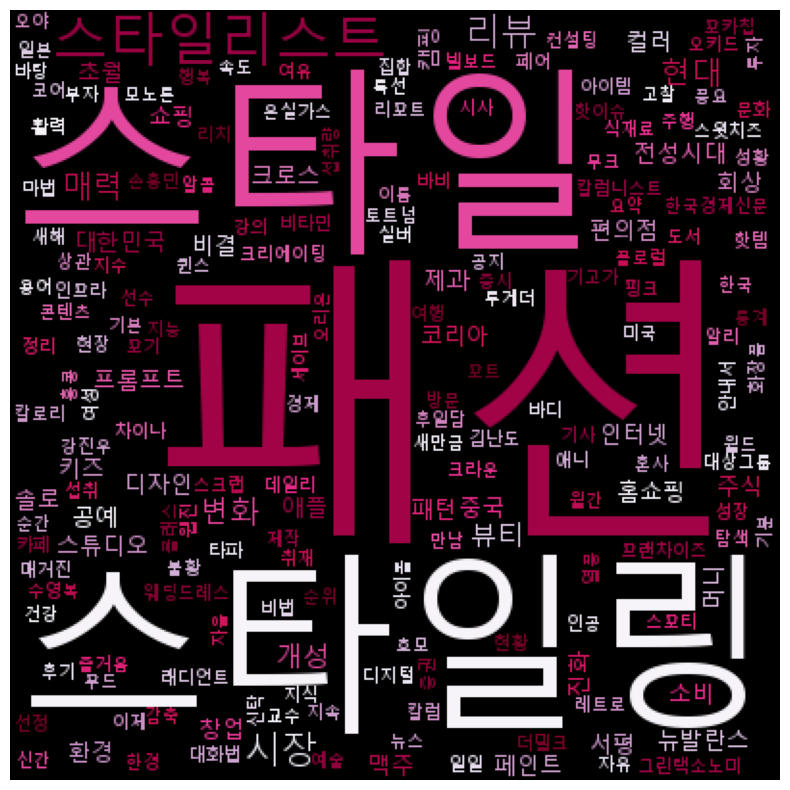

In [22]:
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'PuRd')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기